## Problem 3
## 3(a)

In [31]:
# Import packages
import numpy as np
import pandas as pd
import scipy.stats as sts
import os
import matplotlib.pyplot as plt
import scipy.optimize as opt
import warnings
warnings.filterwarnings('ignore')
from scipy import special
from scipy.integrate import quad
from scipy.linalg import pinv

In [2]:
# Load data
data = np.loadtxt('data/usincmoms.txt')
data.shape

(42, 2)

<IPython.core.display.Javascript object>


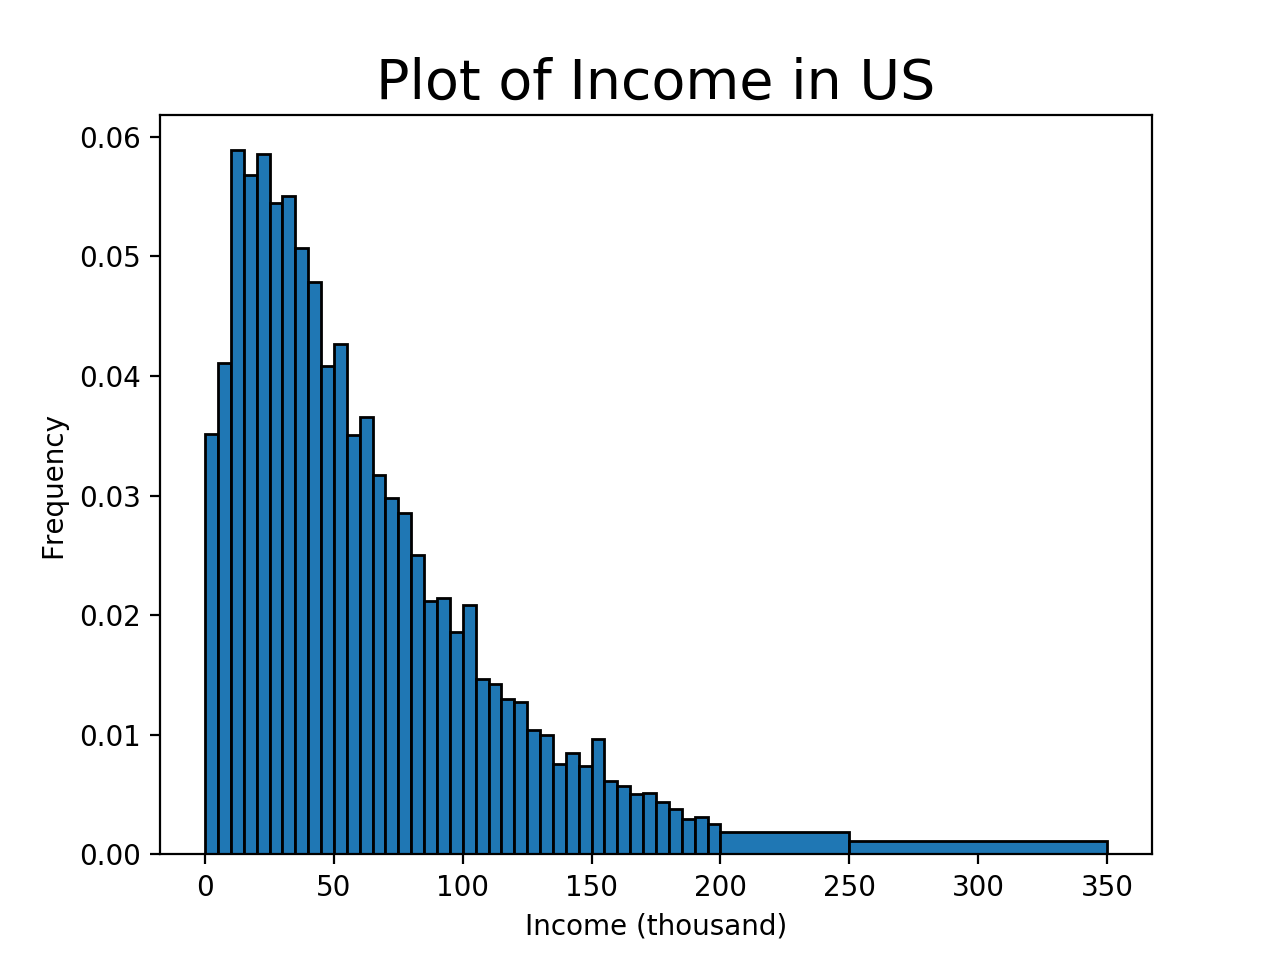

In [3]:
# Plots
%matplotlib notebook
width = np.hstack([np.ones(len(data[:,-1]) - 2)*5, 50, 100])
left = np.hstack([(data[:, 1][1:]/1000-width[:-1])[0:-2],197.5, 225, 300])
plt.bar(left, np.hstack([data[:, 0][:-2], data[:, 0][-2]/10, data[:, 0][-1]/20]), width, edgecolor='k')
plt.title('Plot of Income in US', fontsize=20)
plt.xlabel('Income (thousand)')
plt.ylabel('Frequency')
plt.show()

## 2(b) Log-normal Distribution

In [4]:
def model_moments_ln(xvals, mu, sigma):
    
    pdf_vals = sts.lognorm.pdf(xvals, s = sigma, scale = np.exp(mu))
    
    return pdf_vals


def err_vec_ln(xvals, freqeuncy, mu, sigma, simple=False):
    
    data_moments = frequency
    g = lambda x: model_moments_ln(x, mu, sigma)
    model_moments = np.zeros(len(xvals))
    
    for i in range(len(xvals)):
        model_moments[i] = quad(g, xvals[i]-2500, xvals[i] + 2500)[0]  # Integrate the represented interval
    if simple:
        err_vec = model_moments - data_moments
    else:
        err_vec = (model_moments - data_moments) / data_moments
    
    return err_vec

def crit_ln(params, *args):
    
    mu, sigma = params
    xvals, frequency, W = args
    err = err_vec_ln(xvals, frequency, mu, sigma)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val


In [5]:
xvals = data[:, 1]
frequency = data[:, 0]
W = np.diag(frequency)

mean = (xvals * frequency).sum()
sd = ((xvals - mean) ** 2 * frequency).sum()

mu_init = np.log(mean/(np.sqrt(1 + sd/mean ** 2)))
sigma_init = np.sqrt(np.log(1 + sd/mean ** 2))

bnds = ((None, None), (1e-5, None))
params_init = (mu_init, sigma_init)

ln_args = (xvals, frequency, W)
results = opt.minimize(crit_ln, params_init, args=(ln_args), bounds = bnds)
print(results)
mu_ln, sigma_ln = results.x

      fun: 0.062992115913481556
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -4.89747132e-06,   1.10467191e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 21
      nit: 6
   status: 0
  success: True
        x: array([ 10.86071336,   1.0370576 ])


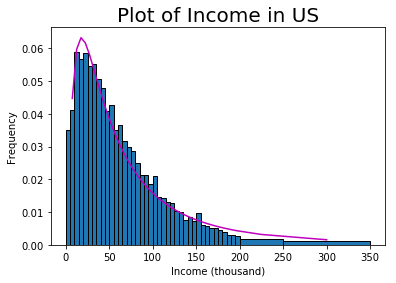

In [6]:
%matplotlib inline
width = np.hstack([np.ones(len(data[:,-1]) - 2)*5, 50, 100])
left = np.hstack([(data[:, 1][1:]/1000-width[:-1])[0:-2],197.5, 225, 300])
plt.bar(left, np.hstack([data[:, 0][:-2], data[:, 0][-2]/10, data[:, 0][-1]/20]), width, edgecolor='k')
plt.title('Plot of Income in US', fontsize=20)
plt.xlabel('Income (thousand)')
plt.ylabel('Frequency')

x = np.hstack([(data[:, 1][1:]-width[:-1])[0:-2]/1000,197.5, 225, 300])
y = width * 1000 * model_moments_ln(x * 1000, mu_ln, sigma_ln)
y[-2] /= 10
y[-1] /= 20
plt.plot(x, y, 'm')
plt.show()

## 3(c) Gamma Distribution

In [7]:
def model_moments_ga(xvals, alpha, beta):
    
    pdf_vals = 1/((beta ** alpha) * special.gamma(alpha)) * (xvals ** (alpha - 1)) * np.exp(-xvals/beta)
    
    return pdf_vals


def err_vec_ga(xvals, freqeuncy, alpha, beta, simple=False):
    
    data_moments = frequency
    g = lambda x: model_moments_ga(x, alpha, beta)
    model_moments = np.zeros(len(xvals))
    
    for i in range(len(xvals)):
        model_moments[i] = quad(g, xvals[i]-2500, xvals[i] + 2500)[0]
    if simple:
        err_vec = model_moments - data_moments
    else:
        err_vec = (model_moments - data_moments) / data_moments
    
    return err_vec

def crit_ga(params, *args):
    
    alpha, beta = params
    xvals, frequency, W = args
    err = err_vec_ga(xvals, frequency, alpha, beta)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [8]:
alpha_init = 3
beta_init = 20000

bnds1 = ((1e-5, None), (1e-5, None))
params_init1 = (alpha_init, beta_init)

ga_args = (xvals, frequency, W)
results1 = opt.minimize(crit_ga, params_init1, args=(ga_args), bounds = bnds1)
print(results1)
alpha_ga, beta_ga = results1.x

      fun: 0.044024590579473645
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.73680514e-06,   1.38777878e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 108
      nit: 28
   status: 0
  success: True
        x: array([  1.40615147e+00,   4.55944321e+04])


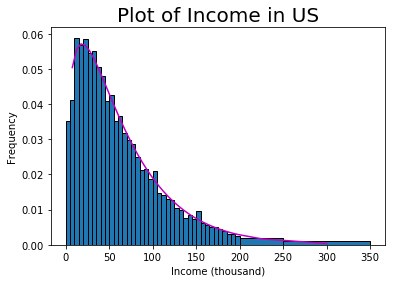

In [9]:
%matplotlib inline
width = np.hstack([np.ones(len(data[:,-1]) - 2)*5, 50, 100])
left = np.hstack([(data[:, 1][1:]/1000-width[:-1])[0:-2],197.5, 225, 300])
plt.bar(left, np.hstack([data[:, 0][:-2], data[:, 0][-2]/10, data[:, 0][-1]/20]), width, edgecolor='k')
plt.title('Plot of Income in US', fontsize=20)
plt.xlabel('Income (thousand)')
plt.ylabel('Frequency')

x = np.hstack([(data[:, 1][1:]-width[:-1])[0:-2]/1000,197.5, 225, 300])
y = width * 1000 * model_moments_ga(x * 1000, alpha_ga, beta_ga)
y[-2] /= 10
y[-1] /= 20
plt.plot(x, y, 'm')
plt.show()

## 2(d) Comparison

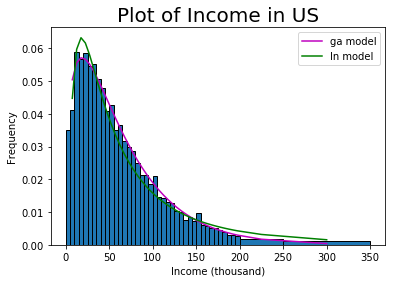

In [10]:
%matplotlib inline
width = np.hstack([np.ones(len(data[:,-1]) - 2)*5, 50, 100])
left = np.hstack([(data[:, 1][1:]/1000-width[:-1])[0:-2],197.5, 225, 300])
plt.bar(left, np.hstack([data[:, 0][:-2], data[:, 0][-2]/10, data[:, 0][-1]/20]), width, edgecolor='k')
plt.title('Plot of Income in US', fontsize=20)
plt.xlabel('Income (thousand)')
plt.ylabel('Frequency')

x = np.hstack([(data[:, 1][1:]-width[:-1])[0:-2]/1000,197.5, 225, 300])
y = width * 1000 * model_moments_ga(x * 1000, alpha_ga, beta_ga)
y[-2] /= 10
y[-1] /= 20
plt.plot(x, y, 'm', label = 'ga model')

x = np.hstack([(data[:, 1][1:]-width[:-1])[0:-2]/1000,197.5, 225, 300])
y = width * 1000 * model_moments_ln(x * 1000, mu_ln, sigma_ln)
y[-2] /= 10
y[-1] /= 20
plt.plot(x, y, 'g', label='ln model')

plt.legend()
plt.show()

There is no precise way to tell which model fits the data better. One of the key advantages of GMM is its flexibility--we do not have to make any model assumption. However, if there is no model assumption, it would be impossible to conduct hypothesis testing. Model choice comes down to which moment of the data we are most interested in modelling. As seen from the plot, it seems that the GA distribution fits the data better overall. However, it is worse at predicting the number of households that fall into the lowest income catogory than the LN model.

## 1(e)

In [11]:
# Step 1
W = np.identity(42)

ga_args1 = (xvals, frequency, W)
results2 = opt.minimize(crit_ga, params_init1, args=(ga_args1), bounds = bnds1)
print(results2)
alpha_ga2, beta_ga2 = results2.x

      fun: 2.124434778949746
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.0002931,  0.       ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 159
      nit: 28
   status: 0
  success: True
        x: array([  1.40908038e+00,   4.46600398e+04])


In [58]:
# Step 2
e = err_vec_ga(xvals, frequency, alpha_ga2, beta_ga2)
Omega_2 = np.outer(e.T, e) # I took out the factor (1/N) since the entries are already so small
W1 = pinv(Omega_2)

In [61]:
# Step 3
params_init2 = (3, 20000)
ga_args3 = (xvals, frequency, W1)
results3 = opt.minimize(crit_ga, params_init2, args=(ga_args3), bounds = bnds1)
print(results3)
alpha_ga3, beta_ga3 = results3.x

      fun: -2665062953047493.0
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -7.46500000e+10,   1.24200000e+11])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 4
   status: 0
  success: True
        x: array([  3.41345616e+00,   1.99999999e+04])


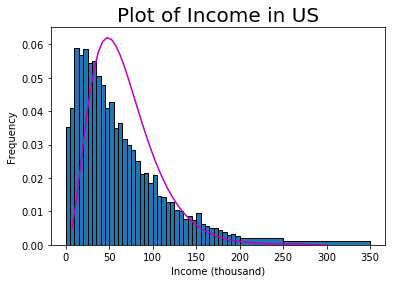

In [62]:
%matplotlib inline
width = np.hstack([np.ones(len(data[:,-1]) - 2)*5, 50, 100])
left = np.hstack([(data[:, 1][1:]/1000-width[:-1])[0:-2],197.5, 225, 300])
plt.bar(left, np.hstack([data[:, 0][:-2], data[:, 0][-2]/10, data[:, 0][-1]/20]), width, edgecolor='k')
plt.title('Plot of Income in US', fontsize=20)
plt.xlabel('Income (thousand)')
plt.ylabel('Frequency')

x = np.hstack([(data[:, 1][1:]-width[:-1])[0:-2]/1000,197.5, 225, 300])
y = width * 1000 * model_moments_ga(x * 1000, alpha_ga3, beta_ga3)
y[-2] /= 10
y[-1] /= 20
plt.plot(x, y, 'm')

plt.show()

It seems that the 2-step matrix gives us a worse fit. This might result from the fact that the error vector has very small magnitude using just the identity matrix, so inversing leads to greater deviation.